In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import shap 
import sklearn
from sklearn.model_selection import train_test_split
from shap.benchmark import SequentialPerturbation
from shap.benchmark import get_benchmark, trend_plot, compare_plot

In [2]:
metrics = {'sort_order': ['positive', 'negative'], 'perturbation': ['keep', 'remove']}

In [3]:
model_generator = lambda: xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X,y = shap.datasets.boston()
X = X.values

test_size = 0.3 
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = model_generator().fit(X_train, y_train)

In [4]:
explainer_masker = X

In [5]:
permutation_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='permutation')
tree_explainer = shap.Explainer(model, explainer_masker, algorithm='tree')
exact_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='exact')

In [6]:
nsamples = 100
inds = sklearn.utils.resample(np.arange(X.shape[0]), n_samples=nsamples)
benchmark_masker = shap.maskers.Independent(X[inds,:])

In [7]:
benchmarks = dict()
benchmarks[permutation_explainer.name] = get_benchmark(model.predict, X_train, y_train, permutation_explainer, benchmark_masker, metrics)
benchmarks[tree_explainer.name] = get_benchmark(model.predict, X_train, y_train, tree_explainer, benchmark_masker, metrics)
benchmarks[exact_explainer.name] = get_benchmark(model.predict, X_train, y_train, exact_explainer, benchmark_masker, metrics)

Permutation explainer: 355it [00:23, 15.30it/s]                                                                                                     
Permutation explainer: 355it [00:23, 14.92it/s]                                                                                                     
Permutation explainer: 355it [00:24, 14.48it/s]                                                                                                     


Permutation explainer: 355it [00:21, 16.45it/s]                                                                                                     


Exact explainer: 355it [23:37,  3.99s/it]                                                                                                           


Exact explainer: 355it [11:16,  1.91s/it]                                                                                                           
Exact explainer: 355it [16:41,  2.82s/it]                                                                                                           
Exact explainer: 355it [29:17,  4.95s/it]                                                                                                           


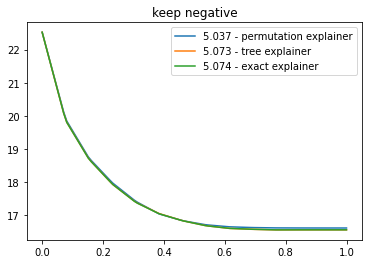

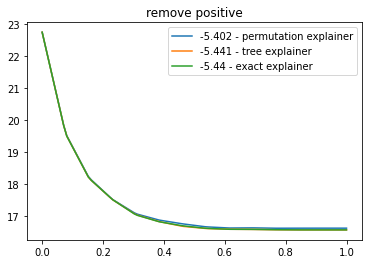

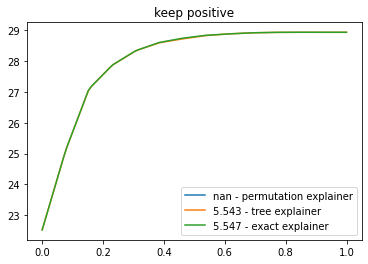

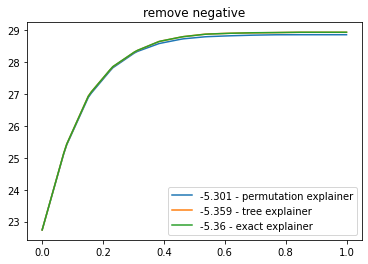

In [8]:
trend_plot(benchmarks)

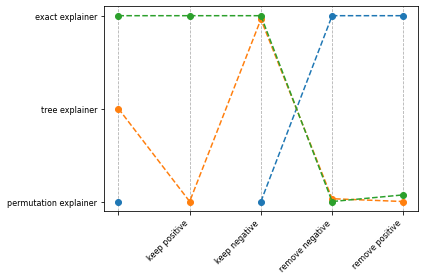

In [9]:
compare_plot(benchmarks)